## Projeto 2 - Ciência dos Dados

**Feito por:**

Cesar Ades

Diogo Duarte

Jonathan Sutton

Joras Oliveira

## Introdução

Para o Projeto 2 da disciplina de Ciência dos Dados, decidimos trabalhar com um target qualitativo, que classificaria se a música seria um “hit” ou não, com o critério de ela ter aparecido na lista semanal top 100 da empresa Billboard entre os anos de 2010 até 2019. Para chegar ao resultado final, utilizaremos um classificador com uma base de dados de aproximadamente 6400 músicas.

**Importando as bibliotecas a serem utilizadas**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

**Começando a leitura e manipulação dos dados**

In [2]:
import chardet
with open('dataset-of-10s.csv', 'rb') as rawdata: # Abre o dataset
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [3]:
dados = pd.read_csv('dataset-of-10s.csv',encoding='utf-8') # Faz a leitura do Dataset.

del dados['uri'] # Coluna de identificação de músicas do Spotify removida, pois são valores únicos que não influenciam no trabalho.

dados.head(50) # Imprime as primeiros 50 músicas do Dataset.

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,0.741,0.6260,1,-4.826,0,0.0886,0.020000,0.000000,0.0828,0.7060,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,0.447,0.2470,5,-14.661,0,0.0346,0.871000,0.814000,0.0946,0.2500,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,0.550,0.4150,9,-6.557,0,0.0520,0.161000,0.000000,0.1080,0.2740,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,0.502,0.6480,0,-5.698,0,0.0527,0.005130,0.000000,0.2040,0.2910,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,0.807,0.8870,1,-3.892,1,0.2750,0.003810,0.000000,0.3910,0.7800,160.517,144244,4,24.99199,8,1
5,Here's To Never Growing Up,Avril Lavigne,0.482,0.8730,0,-3.145,1,0.0853,0.011100,0.000000,0.4090,0.7370,165.084,214320,4,32.17301,12,1
6,Sex Metal Barbie,In This Moment,0.533,0.9350,0,-3.704,1,0.1280,0.013900,0.000000,0.1680,0.4810,140.092,262493,4,21.04510,14,0
7,Helluva Night,Ludacris,0.736,0.5220,2,-8.020,1,0.1160,0.029900,0.000000,0.1080,0.3690,97.547,200387,4,60.21027,10,1
8,Holiday With HH,No Bros,0.166,0.9850,7,-2.886,1,0.1700,0.001830,0.014200,0.9580,0.1390,174.725,252787,4,31.23583,11,0
9,My Last,Big Sean Featuring Chris Brown,0.387,0.7730,8,-5.685,1,0.1700,0.098000,0.000000,0.2090,0.3680,78.629,254120,4,23.30245,9,1


In [4]:
#Quantidade de Musicas
index = dados. index
number_of_rows = len(index)
print(f'Este Dataset tem:  {number_of_rows} linhas' )

dados.shape #numero de linhas e colunas

Este Dataset tem:  6398 linhas


(6398, 18)

In [5]:
dados.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292538,12.000000,1.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000


In [6]:
print(dados.target.value_counts(True))
print(dados.dtypes)

1    0.5
0    0.5
Name: target, dtype: float64
track                object
artist               object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object


In [7]:
#todos os hits
hit = dados.loc[dados["target"] == 1, :]
hit

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000000,0.0828,0.706,108.029,188493,4,41.18681,10,1
2,Love Someone,Lukas Graham,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000000,0.1080,0.274,172.065,205463,4,44.89147,9,1
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000000,0.3910,0.780,160.517,144244,4,24.99199,8,1
5,Here's To Never Growing Up,Avril Lavigne,0.482,0.873,0,-3.145,1,0.0853,0.01110,0.000000,0.4090,0.737,165.084,214320,4,32.17301,12,1
7,Helluva Night,Ludacris,0.736,0.522,2,-8.020,1,0.1160,0.02990,0.000000,0.1080,0.369,97.547,200387,4,60.21027,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6390,Tear In My Heart,twenty one pilots,0.655,0.632,2,-4.802,1,0.0489,0.01890,0.000000,0.0722,0.447,120.113,188493,4,51.52804,8,1
6391,Sweater Weather,The Neighbourhood,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,240400,4,91.20552,7,1
6392,Untouchable,YoungBoy Never Broke Again,0.780,0.784,1,-5.039,1,0.1860,0.04470,0.000000,0.1220,0.430,85.023,180706,4,46.62277,8,1
6394,Calling My Spirit,Kodak Black,0.910,0.366,1,-9.954,1,0.0941,0.09960,0.000000,0.2610,0.740,119.985,152000,4,32.53856,8,1


In [8]:
#todos os nao hits
not_hit = dados.loc[dados["target"] == False, :]
not_hit

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
1,Surfboard,Esquivel!,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.8140,0.0946,0.2500,155.489,176880,3,33.18083,9,0
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.0000,0.2040,0.2910,91.837,193043,4,29.52521,7,0
6,Sex Metal Barbie,In This Moment,0.533,0.935,0,-3.704,1,0.1280,0.01390,0.0000,0.1680,0.4810,140.092,262493,4,21.04510,14,0
8,Holiday With HH,No Bros,0.166,0.985,7,-2.886,1,0.1700,0.00183,0.0142,0.9580,0.1390,174.725,252787,4,31.23583,11,0
11,Cirrus,Bonobo,0.640,0.844,2,-8.412,0,0.0374,0.39500,0.9330,0.0827,0.3640,119.042,352247,4,80.60317,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6384,Gimme D' Road - Carnival Mix,Calypso Rose,0.395,0.927,4,-4.418,1,0.1650,0.11600,0.0000,0.4410,0.9410,188.384,191905,3,68.27089,8,0
6386,Vast Changes,Regentum,0.396,0.044,9,-25.088,0,0.0370,0.98400,0.9470,0.0802,0.0898,71.200,224636,5,15.34214,12,0
6393,Lotus Flowers,Yolta,0.172,0.358,9,-14.430,1,0.0342,0.88600,0.9660,0.3140,0.0361,72.272,150857,4,24.30824,7,0
6396,Stormy Weather,Oscar Peterson,0.600,0.177,7,-16.070,1,0.0561,0.98900,0.8680,0.1490,0.5600,120.030,213387,4,21.65301,14,0


**Análise explorátoria inicial**

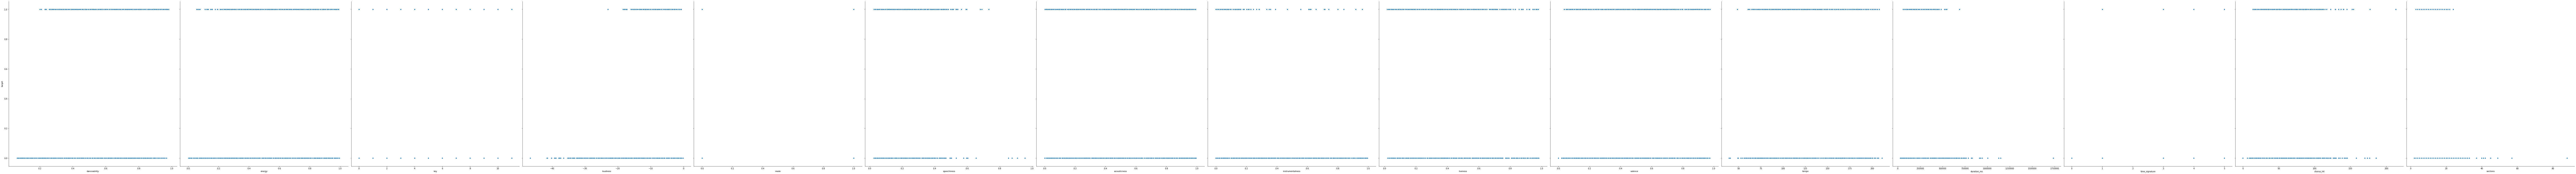

In [9]:
# Plotando gráficos que relacionam cada classificação com a feature
sns.pairplot(
    dados,
    x_vars = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',  'instrumentalness',  'liveness',  'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections'],
    y_vars = ['target'],
    height = 12,
)

**Análise escrita dos gráficos acima:** Na célula acima foram plotados vários gráficos, e cada um compara uma das features do dataset com o nosso target (se foi um hit ou não). Em alguns gráficos não foi possível tirar conclusões pois, tanto os hits quanto os não hits possuem comportamentos bastante parecidos.

- No gráfico que contempla a feature "loudness", é possível perceber que todos o shits tiveram um índice de loudness maior do que os não hits. 

- No gráfico que contempla a feature "instrumentalness", a maioria dos hits estão concentrados em músicas menos instrumentais, enquanto os não hits estão mais espalhados .

- No gráfico que contempla a feature "duration_ms", tanto os hits quanto os não hits são músicas que duram um tempo relativamente curto. As não hits variam um pouco mais.

- No gráfico que contempla a feature "sections", fica perceptível um comportamento parecido com o do "duration_ms", onde ambos estão concentradas com índices mais curtos.

- O resto dos gráficos possuem um comportamento mais parecido entre os hits e os não hits.

- Nos graficos de "key", "mode" e "time signature" temos apenas valores inteiros, portanto o adequado seria um grafico que mostra a densidade de cada valor da feature, por target

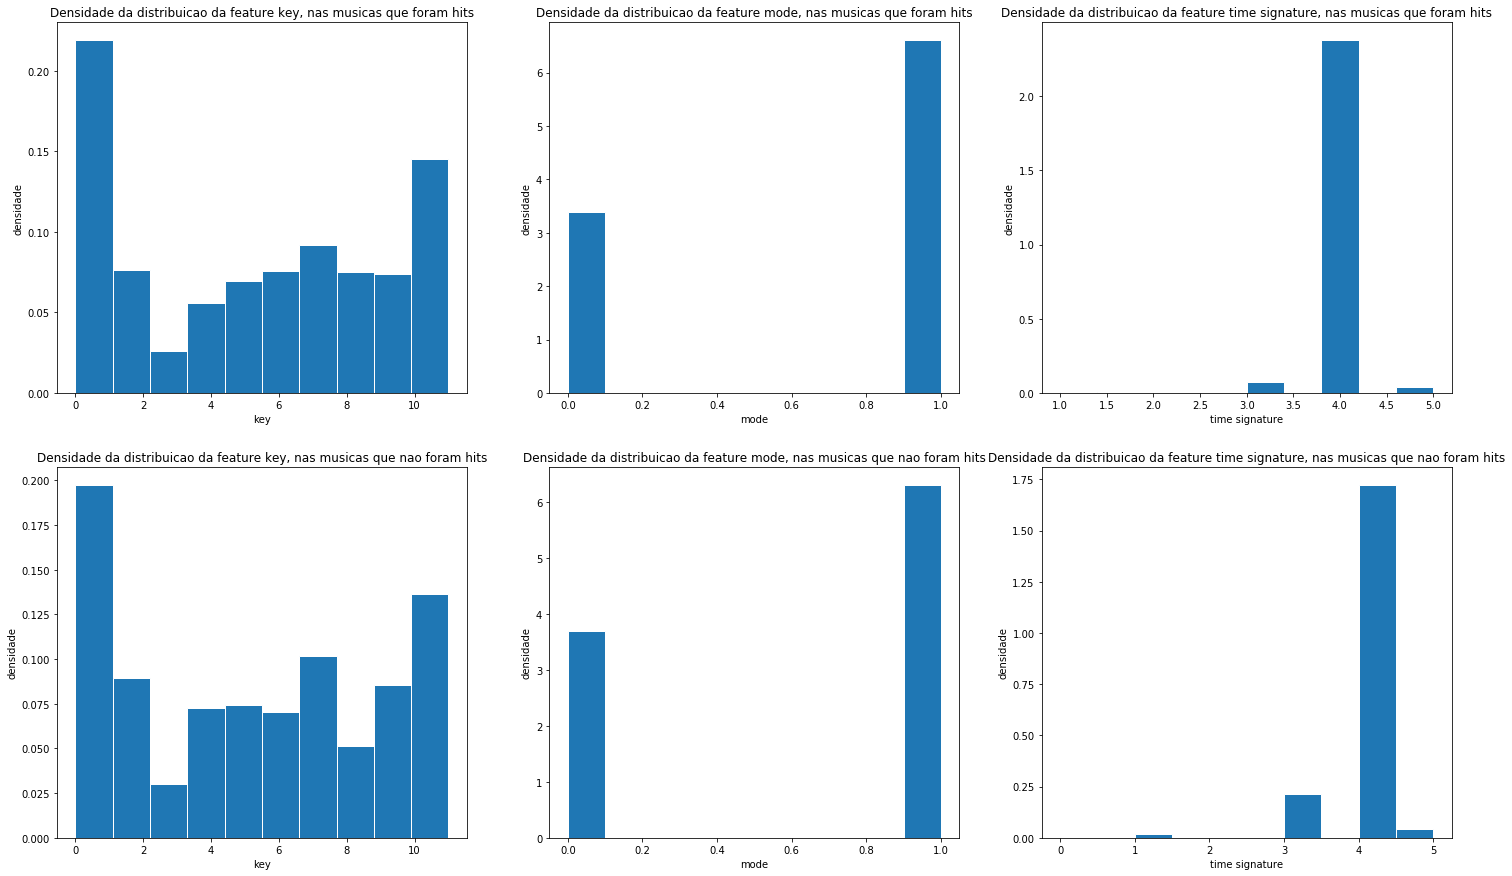

In [10]:
plt.figure(figsize=(25, 15))

plt.subplot(231)
plt.hist(hit["key"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao da feature key, nas musicas que foram hits")
plt.ylabel('densidade')
plt.xlabel('key')

plt.subplot(234)
plt.hist(not_hit["key"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao da feature key, nas musicas que nao foram hits")
plt.ylabel('densidade')
plt.xlabel('key')

plt.subplot(232)
plt.hist(hit["mode"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao da feature mode, nas musicas que foram hits")
plt.ylabel('densidade')
plt.xlabel('mode')

plt.subplot(235)
plt.hist(not_hit["mode"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao da feature mode, nas musicas que nao foram hits")
plt.ylabel('densidade')
plt.xlabel('mode')

plt.subplot(233)
plt.hist(hit["time_signature"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao da feature time signature, nas musicas que foram hits")
plt.ylabel('densidade')
plt.xlabel('time signature')


plt.subplot(236)
plt.hist(not_hit["time_signature"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao da feature time signature, nas musicas que nao foram hits")
plt.ylabel('densidade')
plt.xlabel('time signature')

plt.show()

**Analise:**
Acima temos os graficos de densidade das variaveis "key", "mode", "time signature", comparando com o target, tanto para as musicas que foram um sucesso quanto para as que nao foram. Podemos vez que tanto em Key quanto em Mode nao temos uma diferenca grande entre target de 0 e de 1, porem na itme signature temos um contraste claro, em que a grande marioria das musicas que foram um sucesso tem um tempo de 4/4, enquanto as que nao foram estao com as time signatures diferentes.

**Começando a desenvolver Regressão Logística**
- Regressão Logística: é uma técnica que produz um modelo que permite a predição de uma  variável categórica, a partir de outras variáveis que complementam o dataset. Esta predição é feita a partir das probabilidades, e densidades das features, similar a Naive Bayes, criando uma função que estima a probabilidade da variável pertencer ou não a classificação alvo, e um threshold, onde todo valor acima é considerado parte da classificação (1)  e todo valor abaixo não (0).


In [11]:
# Definindo o grupo de variáveis independentes
X = dados[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',  'instrumentalness',  'liveness',  'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections']]

# Definindo o grupo de variáveis dependentes
y = dados[['target']]

# Montando o teste e treinamento
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=30)

#for: 10 splits diferentes, e rodar a funcao em cada, 

Para a separacao da base de dados, fizemos um split de 25%, ou seja 75% da base de dados para treinamento e 25% para teste. Apos alguns problemas com a seed do random state variando demais de maquina a maquina, decidimos trancar ela em um valor que foi aleatoriamente decidido pelo grupo, no caso nos fomos com o primeiro valor falado e nao testamos outros valores para nao corrermos os ricos de enviezar o resultado.

In [12]:
# Aplicando a lógica da Regressão Logística
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

D:\anaconda-Python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


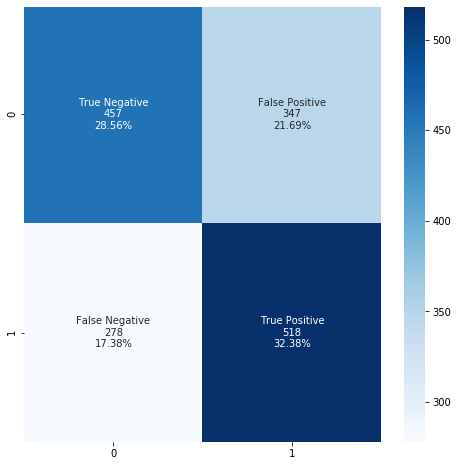

In [13]:
# Montando a matriz de confusão
lista = list(y_test['target'])

plt.figure(figsize=(8,8))

cf_matrix = confusion_matrix(lista, y_pred)

#criando as labels e valores para a legenda da matriz de confusão
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)



sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', )
plt.ylim(2, 0.01)#limitando o tamanho da matriz para ajusat o posicionamento das labels
plt.show()

**Explicando a matriz de confusão acima:**
- 32.38% e 28.56% de True positive e False nengative respectivamente
- 21.69% de Type 1 error e 17.38% de Type 2 error, achamos que da pra melhorar isto com outro modelo!

In [14]:
# Mostrando a acúracia do nosso classificador
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred, normalize = True))
plt.show()

Accuracy:  0.609375


**Começando a desenvolver Classificador Random Forest**
- Classificador Random Forest cria uma “floresta” com várias árvores de decisões durante a fase de treinamento do dataset, e no final ele retorna um valor de predição levando em conta todos os valores de resultados das árvores individuais. Com a combinação de todas essas árvores, o classificador consegue indicar a decisão com maior acurácia, isto ocorre pelo efeito de massas, onde se uma árvore começa a desviar para fora dos resultados com maior probabilidade, o resto da floresta de árvores se mantém, garantindo o sucesso da maioria. Uma analogia para isto eh um portfólio de investimentos, onde se um investimento está negativo (uma árvore começa a desviar), mas a maioria se mantém positivo (o resto da “floresta” se mantém na trilha do melhor resultado estatístico) e então o retorno no final do mês será positivo (o resultado do modelo será a árvore de decisão que melhor encaixa no modelo)


In [15]:
#Aplicando a lógica de Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred2 = clf.predict(X_test)

D:\anaconda-Python\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


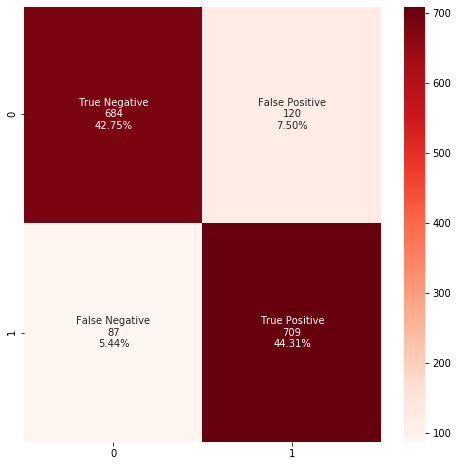

In [16]:
#Montando a matriz de confusão 
plt.figure(figsize=(8,8))

mat = confusion_matrix(lista, y_pred2)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts2 = ["{0:0.0f}".format(value) for value in mat.flatten()]
group_percentages2 = ["{0:.2%}".format(value) for value in mat.flatten()/np.sum(mat)]
labels2 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts2,group_percentages2)]
labels2 = np.asarray(labels2).reshape(2,2)

sns.heatmap(mat, annot=labels2, fmt='', cmap='Reds', )
plt.ylim(2, 0.01)

plt.show()

**Explicando a matriz de confusão acima:**
- 42.94% e 42.56% de True positive e False nengative respectivamente, uma melhoria significativa com o random forest!
- 7.69% de Type 1 error e 6.81% de Type 2 error.

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2, normalize = True))

Accuracy: 0.870625


**Conclusão**: Tendo em vista a nossa pergunta inicial, podemos analisar que o modelo de Random Forest seria a melhor maneira de obtermos uma resposta, visto que ele possui uma maior acurácia em relação a Regressão Logística. Desta forma, para sabermos se certa música seria um hit ou não, iremos utilizar o modelo de Random Forest.


- Acurácia Regressão Logística: 60%
- Acurácia Random Forest: 87%


Comparação entre os dois classificadores:

Comparando os dois classificadores, vemos que o Random Forest possui uma acurácia maior que o do Regressão Logística. Podemos explicar este ocorrido pelo fato do Random Forest levar em conta várias árvores de decisões, resultando em uma maior número de análises probabilísticas comparando a Regressão Logística, fazendo com que o Random Forest tenha uma maior precisão acerca de seus valores.
